In [19]:
import time
import tensorflow as tf
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU
import numpy as np
from numpy import newaxis
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [37]:
def myfunc(t):
    A = np.random.rand(1)
    B = np.random.rand(1)
    C = np.random.rand(1)
    D = 100 + np.random.rand(1)
    E = np.random.rand(1)
    F = 0 # having trouble shifting graph -- get exact values and plot on Desmos
    return (A * np.exp(-(np.square((t-F)-B))/(np.square(C))) * np.sin(D*t + E))
    
def noisy(y):
    noise = np.random.uniform(-0.5, 0.5, size=y.shape)
    # try reducing noise range, and try np.random.normal
    return y + noise

t = np.linspace(-2, 3, 8192)

# Generate training data
clean_data = []
noisy_data = []
for i in range(4500):
    clean_data.append(t)
    clean_data[i] = myfunc(clean_data[i])
    noisy_data.append(t)
    noisy_data[i] = noisy(clean_data[i])

# Generate test data
clean_data_test = []
noisy_data_test = []
for i in range(500):
    clean_data_test.append(t)
    clean_data_test[i] = myfunc(clean_data_test[i])
    noisy_data_test.append(t)
    noisy_data_test[i] = noisy(clean_data_test[i])

# Convert Python Lists to NumPy Arrays
x_train = np.asarray(noisy_data)
y_train = np.asarray(clean_data)
x_test = np.asarray(noisy_data_test)
y_test = np.asarray(clean_data_test)

Example from Training Data:


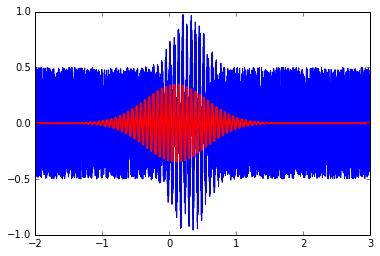

Example from Testing Data:


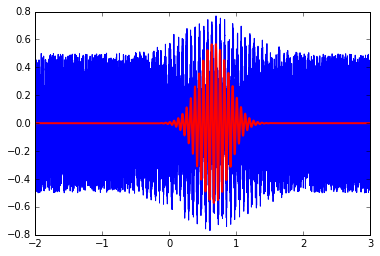

In [41]:
print("Example from Training Data:")
plt.cla()
plt.plot(t, noisy_data[int(np.random.uniform(0, 4500))], "b-")
plt.plot(t, clean_data[int(np.random.uniform(0, 4500))], "r-", linewidth=2.0)
plt.show()

print("Example from Testing Data:")
plt.cla()
plt.plot(t, noisy_data_test[int(np.random.uniform(0, 500))], "b-")
plt.plot(t, clean_data_test[int(np.random.uniform(0, 500))], "r-", linewidth=2.0)
plt.show()

In [3]:
def build_model():
    
    model = Sequential()

    model.add(Dense(8192, input_shape=(8192,)))
    model.add(Activation("relu"))
    
    model.add(Dense(8192))
    model.add(Activation("relu"))
    
    model.add(Dense(8192))
    model.add(Activation("relu"))
    
    model.add(Dense(8192))
    model.add(Activation("linear"))
    
    model.compile(loss="mse", optimizer="rmsprop")
        
    return model

In [4]:
epochs = 50
global_start_time = time.time()

model = build_model()

model.fit(x_train,
          y_train,
          batch_size=64,
          nb_epoch=epochs,
          validation_split=0.1)

predicted = model.predict(x_test)

/home/arjung2/.local/lib/python2.7/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 4050 samples, validate on 450 samples
Epoch 1/50
4050/4050 [==============================] - 7s 2ms/step - loss: 17.3542 - val_loss: 0.0051
Epoch 2/50
4050/4050 [==============================] - 5s 1ms/step - loss: 0.0046 - val_loss: 0.0065
Epoch 3/50
4050/4050 [==============================] - 5s 1ms/step - loss: 0.0039 - val_loss: 0.0026
Epoch 4/50
4050/4050 [==============================] - 5s 1ms/step - loss: 0.0046 - val_loss: 0.0020
Epoch 5/50
4050/4050 [==============================] - 5s 1ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 6/50
4050/4050 [==============================] - 5s 1ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 7/50
4050/4050 [==============================] - 5s 1ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 8/50
4050/4050 [==============================] - 5s 1ms/step - loss: 9.7114e-04 - val_loss: 8.3377e-04
Epoch 9/50
4050/4050 [==============================] - 5s 1ms/step - loss: 8.6181e-04 - val_loss: 8.4945e-04
Epoch 10/50
4050/4

In [8]:
t_two = np.linspace(-2, 3, 8192)
avg = 0
for i in range(500):
    if np.sum(y_test[i] - predicted[i]) > 0:
        avg += np.sum(y_test[i] - predicted[i])
    else:
        avg -= np.sum(y_test[i] - predicted[i])
    
print(avg / 500)

0.269099797573


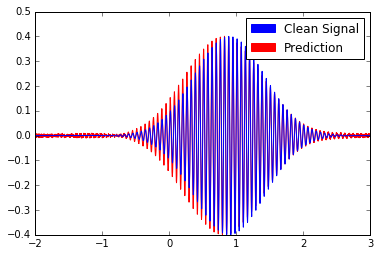

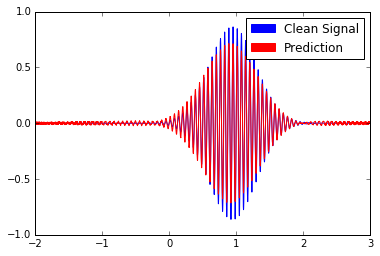

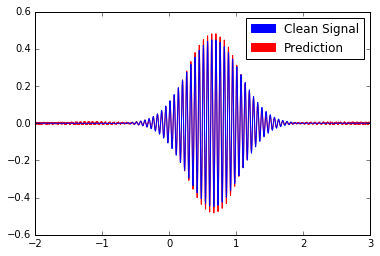

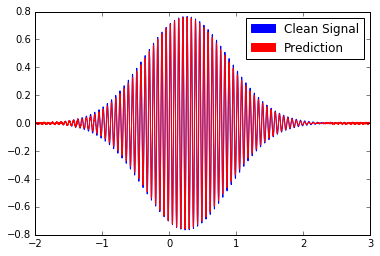

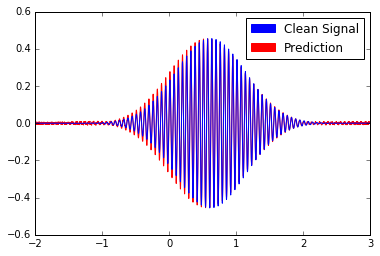

In [31]:
plt.plot(t_two, predicted[1], "r-", label='Prediction')
plt.plot(t_two, y_test[1], "b-", label='True Data')
red_patch = mpatches.Patch(color='red', label='Prediction')
blue_patch = mpatches.Patch(color='blue', label='Clean Signal')
plt.legend(handles=[blue_patch, red_patch])
plt.show()

plt.plot(t_two, y_test[8], "b-", label='True Data')
plt.plot(t_two, predicted[8], "r-", label='Prediction')
red_patch = mpatches.Patch(color='red', label='Prediction')
blue_patch = mpatches.Patch(color='blue', label='Clean Signal')
plt.legend(handles=[blue_patch, red_patch])
plt.show()

plt.plot(t_two, predicted[2], "r-", label='Prediction')
plt.plot(t_two, y_test[2], "b-", label='True Data')
red_patch = mpatches.Patch(color='red', label='Prediction')
blue_patch = mpatches.Patch(color='blue', label='Clean Signal')
plt.legend(handles=[blue_patch, red_patch])
plt.show()

plt.plot(t_two, y_test[9], "b-", label='True Data')
plt.plot(t_two, predicted[9], "r-", label='Prediction')
red_patch = mpatches.Patch(color='red', label='Prediction')
blue_patch = mpatches.Patch(color='blue', label='Clean Signal')
plt.legend(handles=[blue_patch, red_patch])
plt.show()

plt.plot(t_two, predicted[7], "r-", label='Prediction')
plt.plot(t_two, y_test[7], "b-", label='True Data')
red_patch = mpatches.Patch(color='red', label='Prediction')
blue_patch = mpatches.Patch(color='blue', label='Clean Signal')
plt.legend(handles=[blue_patch, red_patch])
plt.show()
